In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
import pandas as pd
import numpy as np

In [273]:
dataset = pd.read_csv('/content/drive/MyDrive/PRML LAB DATASETS/SalaryDataset/Dataset.csv')

In [274]:
dataset.head(1)

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687


## Preprocessing

In [275]:
dataset.drop(columns = ["Unnamed: 0"],inplace=True)
dataset.head(4)

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313


In [276]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            19802 non-null  object
 1   job_description       15384 non-null  object
 2   job_desig             19802 non-null  object
 3   job_type              4797 non-null   object
 4   key_skills            19801 non-null  object
 5   location              19802 non-null  object
 6   salary                19802 non-null  object
 7   company_name_encoded  19802 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.2+ MB




*   job_description contains missing values but can be imputed
*   job_type contains most of the values missing, so drop that column



In [277]:
dataset.drop(columns = ["job_type"],inplace = True)

In [278]:
dataset['job_description'].fillna('missing', inplace=True)
dataset.dropna(axis=0,inplace=True)

In [279]:
dataset.head(2)

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458


In [280]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            19801 non-null  object
 1   job_description       19801 non-null  object
 2   job_desig             19801 non-null  object
 3   key_skills            19801 non-null  object
 4   location              19801 non-null  object
 5   salary                19801 non-null  object
 6   company_name_encoded  19801 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB
None


All the missing values are handled. Now, let's preprocess the dataset.

In [281]:
import re

In [282]:
cols = ['job_description','job_desig','key_skills','location']

In [283]:
for c in cols:
    dataset[c] = dataset[c].apply(lambda x:x.lower())
dataset.head(4)

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
0,5-7 yrs,exp: minimum 5 years;good understanding of ioc...,senior exploit and vulnerability researcher,"team skills, communication skills, analytical ...",delhi ncr(vikas puri),6to10,3687
1,10-17 yrs,he should have handled a team of atleast 5-6 d...,head scm,"ppc, logistics, inventory management, supply c...",sonepat,10to15,458
2,5-9 yrs,must be an effective communicator (written & s...,deputy manager - talent management & leadershi...,"hr analytics, employee engagement, training, s...",delhi ncr,15to25,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,associate manager data engineering,"sql, javascript, automation, python, ruby, ana...",bengaluru,10to15,313


To be encoded are:


1.   Salary 



In [284]:
enc_cols = ['salary']
from sklearn.preprocessing import LabelEncoder
for col in enc_cols:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

In [285]:
dataset.head(2)

,experience,job_description,job_desig,key_skills,location,salary,company_name_encoded
0,5-7 yrs,exp: minimum 5 years;good understanding of ioc...,senior exploit and vulnerability researcher,"team skills, communication skills, analytical ...",delhi ncr(vikas puri),5,3687
1,10-17 yrs,he should have handled a team of atleast 5-6 d...,head scm,"ppc, logistics, inventory management, supply c...",sonepat,1,458


In [286]:
dataset.shape

(19801, 7)

In [287]:
Y = dataset['salary']
X = dataset.drop(columns='salary')

In [288]:
X.shape

(19801, 6)

Preprocessing the text data..

In [289]:
X.head()

,experience,job_description,job_desig,key_skills,location,company_name_encoded
0,5-7 yrs,exp: minimum 5 years;good understanding of ioc...,senior exploit and vulnerability researcher,"team skills, communication skills, analytical ...",delhi ncr(vikas puri),3687
1,10-17 yrs,he should have handled a team of atleast 5-6 d...,head scm,"ppc, logistics, inventory management, supply c...",sonepat,458
2,5-9 yrs,must be an effective communicator (written & s...,deputy manager - talent management & leadershi...,"hr analytics, employee engagement, training, s...",delhi ncr,4195
3,7-10 yrs,7 - 10 years of overall experience in data e...,associate manager data engineering,"sql, javascript, automation, python, ruby, ana...",bengaluru,313
4,1-3 yrs,chartered accountancy degree or mba in finance...,ts- gsa- senior analyst,"accounting, finance, cash flow, financial plan...",gurgaon,1305


In [290]:
def cleanUptheText(data):
    data = re.sub(r'\n',' ',data)
    data = re.sub(r'\t',' ',data)
    data = re.sub(r'\s+',' ',data)
    return data

for col in X.columns:
    if col!='company_name_encoded':
        X[col] = X[col].apply(cleanUptheText)
X.head()

,experience,job_description,job_desig,key_skills,location,company_name_encoded
0,5-7 yrs,exp: minimum 5 years;good understanding of ioc...,senior exploit and vulnerability researcher,"team skills, communication skills, analytical ...",delhi ncr(vikas puri),3687
1,10-17 yrs,he should have handled a team of atleast 5-6 d...,head scm,"ppc, logistics, inventory management, supply c...",sonepat,458
2,5-9 yrs,must be an effective communicator (written & s...,deputy manager - talent management & leadershi...,"hr analytics, employee engagement, training, s...",delhi ncr,4195
3,7-10 yrs,7 - 10 years of overall experience in data eng...,associate manager data engineering,"sql, javascript, automation, python, ruby, ana...",bengaluru,313
4,1-3 yrs,chartered accountancy degree or mba in finance...,ts- gsa- senior analyst,"accounting, finance, cash flow, financial plan...",gurgaon,1305


In [291]:
def cleanUpLocation(data):
    data = re.sub(r'\('," ",data)
    data = re.sub(r'\)'," ",data)
    data = re.sub(r'\s+',' ',data)
    return data
X['location'] = X['location'].apply(cleanUpLocation)

In [292]:
def cleanUpothers(data):
    data = re.sub(r'\('," ",data)
    data = re.sub(r'\)'," ",data)
    data = re.sub(r'&'," ",data)
    data = re.sub(r'$'," ",data)
    data = re.sub(r','," ",data)
    data = re.sub(r';'," ",data)
    data = re.sub(r'(\b\s*-\s*\b)'," ",data)
    data = re.sub(r'\s+',' ',data)
    return data
X['job_description'] = X['job_description'].apply(cleanUpothers)
X['job_desig'] = X['job_desig'].apply(cleanUpothers)
X['key_skills'] = X['key_skills'].apply(cleanUpothers)

X.head(2)

,experience,job_description,job_desig,key_skills,location,company_name_encoded
0,5-7 yrs,exp: minimum 5 years good understanding of ioc...,senior exploit and vulnerability researcher,team skills communication skills analytical sk...,delhi ncr vikas puri,3687
1,10-17 yrs,he should have handled a team of atleast 5 6 d...,head scm,ppc logistics inventory management supply chai...,sonepat,458


In [293]:
X['combined_text'] = X['job_description']+X['job_desig']+X['key_skills']+X['location']
X.head(2)

,experience,job_description,job_desig,key_skills,location,company_name_encoded,combined_text
0,5-7 yrs,exp: minimum 5 years good understanding of ioc...,senior exploit and vulnerability researcher,team skills communication skills analytical sk...,delhi ncr vikas puri,3687,exp: minimum 5 years good understanding of ioc...
1,10-17 yrs,he should have handled a team of atleast 5 6 d...,head scm,ppc logistics inventory management supply chai...,sonepat,458,he should have handled a team of atleast 5 6 d...


In [294]:
X = X[['combined_text','experience','company_name_encoded']]
X.head(2)

,combined_text,experience,company_name_encoded
0,exp: minimum 5 years good understanding of ioc...,5-7 yrs,3687
1,he should have handled a team of atleast 5 6 d...,10-17 yrs,458


In [295]:
def min_exp(exp):
    val = re.sub(r'\-',' ', exp)
    val = val.split(' ')
    val = int(val[0])
    return val

def max_exp(exp):
    val = re.sub(r'\-',' ', exp)
    val = val.split(' ')
    val = int(val[1])
    return val
X['min_exp'] = X['experience'].apply(min_exp)
X['max_exp'] = X['experience'].apply(max_exp)

In [296]:
X.head(2)

,combined_text,experience,company_name_encoded,min_exp,max_exp
0,exp: minimum 5 years good understanding of ioc...,5-7 yrs,3687,5,7
1,he should have handled a team of atleast 5 6 d...,10-17 yrs,458,10,17


In [297]:
X = X[['combined_text','min_exp','max_exp','company_name_encoded']]
X.head(2)

,combined_text,min_exp,max_exp,company_name_encoded
0,exp: minimum 5 years good understanding of ioc...,5,7,3687
1,he should have handled a team of atleast 5 6 d...,10,17,458


NLTK

In [298]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [299]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lem = WordNetLemmatizer()

In [300]:
def lemmitize(data):
    words = word_tokenize(data)
    j = ''
    for i in words:
        try:
            j+=lem.lemmatize(i,pos='a')+' '
        except:
            # pass
            try:
                j+=lem.lemmatize(i,pos='n')+' '
            except:
                # pass
                try:
                    j+=lem.lemmatize(i,pos='v')+' '
                except:
                    j+=i+' '
    return j

In [301]:
X['combined_text'] = X['combined_text'].apply(lemmitize)

In [302]:
X.head(2)

,combined_text,min_exp,max_exp,company_name_encoded
0,exp : minimum 5 years good understanding of io...,5,7,3687
1,he should have handled a team of atleast 5 6 d...,10,17,458


Now the data is preprocessed. Lets split into train test split.

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [304]:
from sklearn.model_selection import train_test_split as tts
X_train, X_val, Y_train, Y_val = tts(X,Y,train_size = 0.8, random_state = 1,stratify=Y)

In [305]:
X_train.head(2)

,combined_text,min_exp,max_exp,company_name_encoded
17166,strong sas background is must experience : 2 1...,2,7,2574
9098,- minimum 5 years serving in a role for human ...,5,10,2778


In [306]:
corpus  = list(X_train['combined_text'])

In [307]:
X_train.shape

(15840, 4)

In [350]:
from sklearn.metrics import classification_report

## **Case 1 => No smoothing**

In [353]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5']


In [354]:
vectorizer1 = TfidfVectorizer(smooth_idf=False,min_df=0.1, max_df = 0.9)

In [355]:
X_train_vec1 = pd.DataFrame(vectorizer1.fit_transform(X_train['combined_text']).toarray())
X_val_vec1 = pd.DataFrame(vectorizer1.transform(X_val['combined_text']).toarray())

In [356]:
X_train_vec1.shape

(15840, 29)

In [357]:
X_train_vec1[29] = X_train.iloc[:,1].values
X_train_vec1[30] = X_train.iloc[:,2].values
X_train_vec1[31] = X_train.iloc[:,3].values
X_val_vec1[29] = X_val.iloc[:,1].values
X_val_vec1[30] = X_val.iloc[:,2].values
X_val_vec1[31] = X_val.iloc[:,3].values

In [358]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 15188 to 6721
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   combined_text         3961 non-null   object
 1   min_exp               3961 non-null   int64 
 2   max_exp               3961 non-null   int64 
 3   company_name_encoded  3961 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 154.7+ KB


In [359]:
X_val_vec1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3961 non-null   float64
 1   1       3961 non-null   float64
 2   2       3961 non-null   float64
 3   3       3961 non-null   float64
 4   4       3961 non-null   float64
 5   5       3961 non-null   float64
 6   6       3961 non-null   float64
 7   7       3961 non-null   float64
 8   8       3961 non-null   float64
 9   9       3961 non-null   float64
 10  10      3961 non-null   float64
 11  11      3961 non-null   float64
 12  12      3961 non-null   float64
 13  13      3961 non-null   float64
 14  14      3961 non-null   float64
 15  15      3961 non-null   float64
 16  16      3961 non-null   float64
 17  17      3961 non-null   float64
 18  18      3961 non-null   float64
 19  19      3961 non-null   float64
 20  20      3961 non-null   float64
 21  21      3961 non-null   float64
 22  

In [360]:
X_train_vec1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.795774,0.0,0.0,0.242498,0.000000,0.0,0.335133,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.275680,2,7,2574
1,0.0,0.0,0.215770,0.0,0.0,0.197256,0.672904,0.0,0.000000,0.0,...,0.531999,0.0,0.0,0.0,0.0,0.0,0.224248,5,10,2778


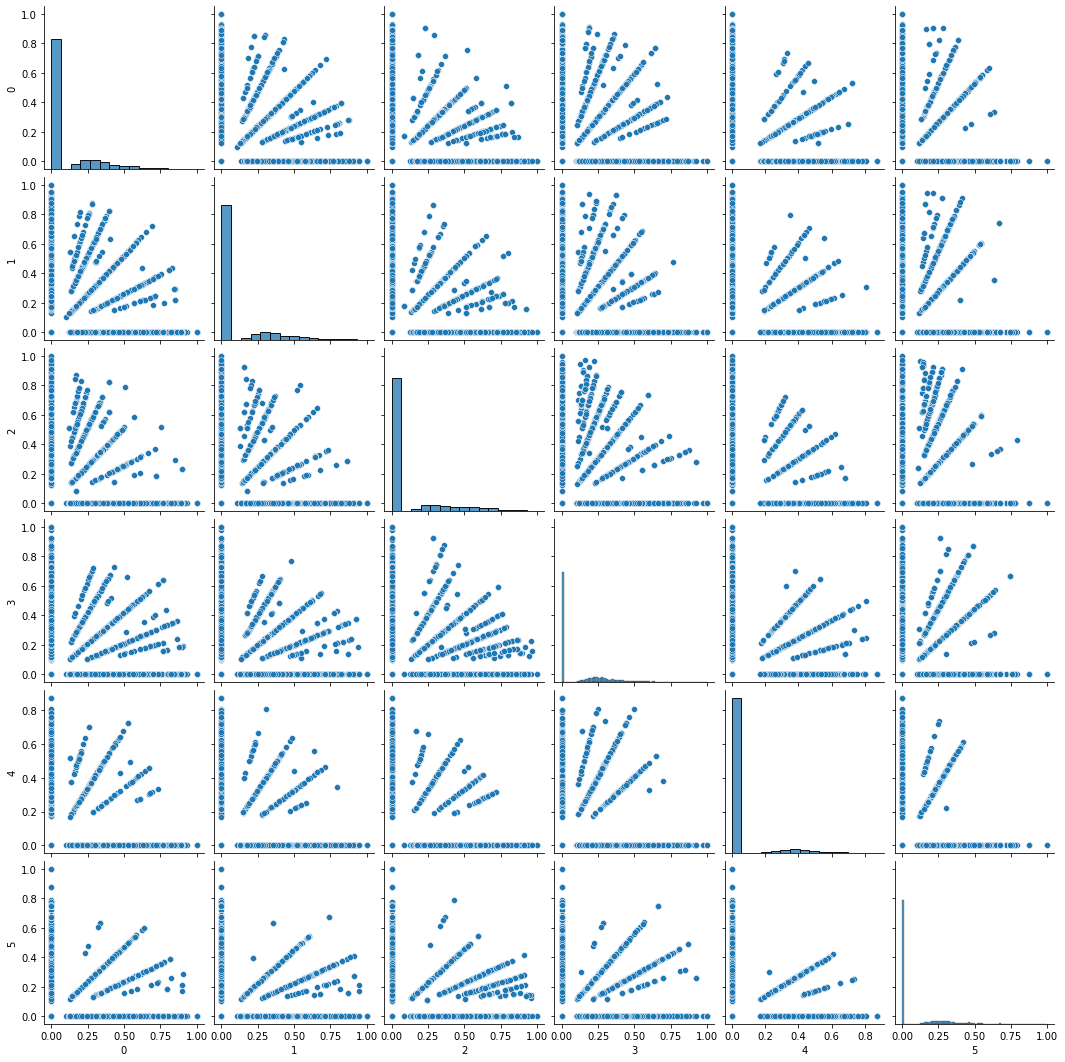

In [361]:
import seaborn as sns
sns.pairplot(X_train_vec1.loc[:,:5])

In [362]:
X_train_vec1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15840 entries, 0 to 15839
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15840 non-null  float64
 1   1       15840 non-null  float64
 2   2       15840 non-null  float64
 3   3       15840 non-null  float64
 4   4       15840 non-null  float64
 5   5       15840 non-null  float64
 6   6       15840 non-null  float64
 7   7       15840 non-null  float64
 8   8       15840 non-null  float64
 9   9       15840 non-null  float64
 10  10      15840 non-null  float64
 11  11      15840 non-null  float64
 12  12      15840 non-null  float64
 13  13      15840 non-null  float64
 14  14      15840 non-null  float64
 15  15      15840 non-null  float64
 16  16      15840 non-null  float64
 17  17      15840 non-null  float64
 18  18      15840 non-null  float64
 19  19      15840 non-null  float64
 20  20      15840 non-null  float64
 21  21      15840 non-null  float64
 22

In [363]:
Y.nunique()

6

In [364]:
from sklearn.metrics import accuracy_score as acc

### Model1

In [365]:
from lightgbm import LGBMClassifier as LGBM
n_estimators = np.arange(start= 40, stop = 150, step = 20)
# n_estimators = np.arange(start= 100, stop = 1500, step = 250)
accuracies = []
train_acc = []
for i in n_estimators:
    lgbm = LGBM(random_state = 1,n_estimators=i,objective='multiclass',num_class = 6,learning_rate=0.075)
    # X_train_vec1.fillna(0,inplace=True)
    lgbm.fit(X_train_vec1,Y_train)
    y_pred_lgbm1 = lgbm.predict(X_val_vec1)
    print(f"Validation Accuracy is {acc(Y_val,y_pred_lgbm1)} for n_estimators: {i}")
    accuracies.append(acc(Y_val,y_pred_lgbm1))
    train_acc.append(acc(Y_train,lgbm.predict(X_train_vec1)))

Validation Accuracy is 0.4493814693259278 for n_estimators: 40
Validation Accuracy is 0.45140116132289826 for n_estimators: 60
Validation Accuracy is 0.45114869982327693 for n_estimators: 80
Validation Accuracy is 0.4466043928300934 for n_estimators: 100
Validation Accuracy is 0.4433223933350164 for n_estimators: 120
Validation Accuracy is 0.44256500883615246 for n_estimators: 140


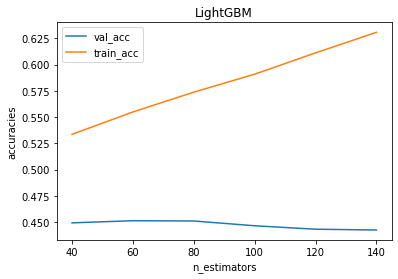

In [366]:
import matplotlib.pyplot as plt
plt.plot(n_estimators,accuracies)
plt.plot(n_estimators,train_acc)
plt.title('LightGBM')
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.legend(['val_acc','train_acc'])

In [368]:
print(classification_report(Y_val, y_pred_lgbm1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.76      0.68       649
     class 1       0.39      0.40      0.39       900
     class 2       0.41      0.56      0.47       825
     class 3       0.57      0.44      0.50       315
     class 4       0.38      0.25      0.30       565
     class 5       0.32      0.23      0.27       707

    accuracy                           0.44      3961
   macro avg       0.45      0.44      0.44      3961
weighted avg       0.43      0.44      0.43      3961



### Model 2

In [369]:
from sklearn.svm import SVC
SVC = SVC(random_state = 1)
SVC.fit(X_train_vec1,Y_train)
y_pred_SVC1 = SVC.predict(X_val_vec1)

In [322]:
print(f"Validation Accuracy is {acc(Y_val,y_pred_SVC1)}")

Validation Accuracy is 0.23201211815198183


In [370]:
print(classification_report(Y_val, y_pred_SVC1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       649
     class 1       0.23      0.88      0.37       900
     class 2       0.00      0.00      0.00       825
     class 3       0.00      0.00      0.00       315
     class 4       0.00      0.00      0.00       565
     class 5       0.23      0.18      0.20       707

    accuracy                           0.23      3961
   macro avg       0.08      0.18      0.09      3961
weighted avg       0.09      0.23      0.12      3961



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 3

In [371]:
from sklearn.ensemble import RandomForestClassifier as rfc
accuraciesRFC = []
n_estimators = [80,100,120,150]
for i in n_estimators:
    RFC = rfc(random_state = 1,n_estimators=i)
    RFC.fit(X_train_vec1,Y_train)
    y_pred_RFC1 = RFC.predict(X_val_vec1)
    print(f"Validation Accuracy is {acc(Y_val,y_pred_SVC1)}")
    accuraciesRFC.append(acc(Y_val,y_pred_SVC1))

Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183


In [372]:
print(classification_report(Y_val, y_pred_RFC1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.61      0.76      0.68       649
     class 1       0.39      0.40      0.39       900
     class 2       0.41      0.56      0.47       825
     class 3       0.57      0.44      0.50       315
     class 4       0.38      0.25      0.30       565
     class 5       0.32      0.23      0.27       707

    accuracy                           0.44      3961
   macro avg       0.45      0.44      0.44      3961
weighted avg       0.43      0.44      0.43      3961



### Model 4

In [324]:
from sklearn.naive_bayes import MultinomialNB as MNB

In [325]:
model = MNB()
model.fit(X_train_vec1,Y_train)
y_pred = model.predict(X_val_vec1)
print("Val accuracy is:",acc(Y_val, y_pred))

Val accuracy is: 0.25902549861146174


In [373]:
print(classification_report(Y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.68      0.61       649
     class 1       0.35      0.45      0.40       900
     class 2       0.43      0.39      0.41       825
     class 3       0.47      0.45      0.46       315
     class 4       0.31      0.20      0.24       565
     class 5       0.30      0.24      0.27       707

    accuracy                           0.40      3961
   macro avg       0.40      0.40      0.40      3961
weighted avg       0.39      0.40      0.39      3961



### Model 5

In [326]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
solver = ['svd', 'lsqr', 'eigen']
for i in solver:
    modelLDA = LDA(solver = i)
    modelLDA.fit(X_train_vec1,Y_train)
    y_pred = modelLDA.predict(X_val_vec1)
    print("Val accuracy is:",acc(Y_val, y_pred))

Val accuracy is: 0.4034334763948498
Val accuracy is: 0.4034334763948498
Val accuracy is: 0.4034334763948498


In [374]:
print(classification_report(Y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.55      0.68      0.61       649
     class 1       0.35      0.45      0.40       900
     class 2       0.43      0.39      0.41       825
     class 3       0.47      0.45      0.46       315
     class 4       0.31      0.20      0.24       565
     class 5       0.30      0.24      0.27       707

    accuracy                           0.40      3961
   macro avg       0.40      0.40      0.40      3961
weighted avg       0.39      0.40      0.39      3961



## Case 2 Smoothing

In [375]:
vectorizer = TfidfVectorizer(smooth_idf=True,min_df=0.1, max_df = 0.9)

In [376]:
X_train_vec1 = pd.DataFrame(vectorizer1.fit_transform(X_train['combined_text']).toarray())
X_val_vec1 = pd.DataFrame(vectorizer1.transform(X_val['combined_text']).toarray())

In [377]:
X_train_vec1.shape

(15840, 29)

In [378]:
X_val_vec1.shape

(3961, 29)

In [379]:
X_train_vec1[29] = X_train.iloc[:,1].values
X_train_vec1[30] = X_train.iloc[:,2].values
X_train_vec1[31] = X_train.iloc[:,3].values
X_val_vec1[29] = X_val.iloc[:,1].values
X_val_vec1[30] = X_val.iloc[:,2].values
X_val_vec1[31] = X_val.iloc[:,3].values

In [380]:
Y.nunique()

6

In [381]:
from sklearn.metrics import accuracy_score as acc

### Model1

In [334]:
from lightgbm import LGBMClassifier as LGBM
n_estimators = np.arange(start= 40, stop = 150, step = 20)
# n_estimators = np.arange(start= 100, stop = 1500, step = 250)
accuracies = []
train_acc = []
for i in n_estimators:
    lgbm = LGBM(random_state = 1,n_estimators=i,objective='multiclass',num_class = 6,learning_rate=0.075)
    # X_train_vec1.fillna(0,inplace=True)
    lgbm.fit(X_train_vec1,Y_train)
    y_pred_lgbm1 = lgbm.predict(X_val_vec1)
    print(f"Validation Accuracy is {acc(Y_val,y_pred_lgbm1)} for n_estimators: {i}")
    accuracies.append(acc(Y_val,y_pred_lgbm1))
    train_acc.append(acc(Y_train,lgbm.predict(X_train_vec1)))

Validation Accuracy is 0.4493814693259278 for n_estimators: 40
Validation Accuracy is 0.45140116132289826 for n_estimators: 60
Validation Accuracy is 0.45114869982327693 for n_estimators: 80
Validation Accuracy is 0.4466043928300934 for n_estimators: 100
Validation Accuracy is 0.4433223933350164 for n_estimators: 120
Validation Accuracy is 0.44256500883615246 for n_estimators: 140


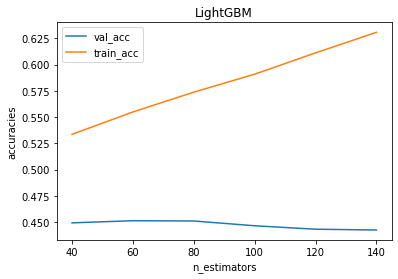

In [335]:
import matplotlib.pyplot as plt
plt.plot(n_estimators,accuracies)
plt.plot(n_estimators,train_acc)
plt.title('LightGBM')
plt.xlabel('n_estimators')
plt.ylabel('accuracies')
plt.legend(['val_acc','train_acc'])

In [ ]:
print(classification_report(Y_val, y_pred_lgbm1, target_names=target_names))

### Model 2

In [336]:
from sklearn.svm import SVC
SVC = SVC(random_state = 1)
SVC.fit(X_train_vec1,Y_train)
y_pred_SVC1 = SVC.predict(X_val_vec1)

In [337]:
print(f"Validation Accuracy is {acc(Y_val,y_pred_SVC1)}")

Validation Accuracy is 0.23201211815198183


In [ ]:
print(classification_report(Y_val, y_pred_SVC1, target_names=target_names))

### Model 3

In [338]:
from sklearn.ensemble import RandomForestClassifier as rfc
accuraciesRFC = []
n_estimators = [30,50,70,80,100,120,150]
for i in n_estimators:
    RFC = rfc(random_state = 1,n_estimators=i)
    RFC.fit(X_train_vec1,Y_train)
    y_pred_RFC1 = RFC.predict(X_val_vec1)
    print(f"Validation Accuracy is {acc(Y_val,y_pred_SVC1)}")
    accuraciesRFC.append(acc(Y_val,y_pred_SVC1))

Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183
Validation Accuracy is 0.23201211815198183


In [ ]:
print(classification_report(Y_val, y_pred_RFC1, target_names=target_names))

### Model 4

In [339]:
from sklearn.naive_bayes import MultinomialNB as MNB

In [340]:
model = MNB()
model.fit(X_train_vec1,Y_train)
y_pred = model.predict(X_val_vec1)
print("Val accuracy is:",acc(Y_val, y_pred))

Val accuracy is: 0.25902549861146174


In [ ]:
print(classification_report(Y_val, y_pred, target_names=target_names))

### Model 5

In [341]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [342]:
solver = ['svd', 'lsqr', 'eigen']
for i in solver:
    modelLDA = LDA(solver = i)
    modelLDA.fit(X_train_vec1,Y_train)
    y_pred = modelLDA.predict(X_val_vec1)
    print("Val accuracy is:",acc(Y_val, y_pred))

Val accuracy is: 0.4034334763948498
Val accuracy is: 0.4034334763948498
Val accuracy is: 0.4034334763948498


In [ ]:
print(classification_report(Y_val, y_pred, target_names=target_names))

# Final Model of the pipeline

In [343]:
vectorizer = TfidfVectorizer(smooth_idf=True,min_df=0.1, max_df = 0.9)

In [344]:
X_train_vec1 = pd.DataFrame(vectorizer.fit_transform(X['combined_text']).toarray())

In [345]:
X_train_vec1.shape

(19801, 29)

In [346]:
X_train_vec1[29] = X.iloc[:,1].values
X_train_vec1[30] = X.iloc[:,2].values
X_train_vec1[30] = X.iloc[:,3].values
# X_val[28] = X_val.iloc[:,1].values
# X_val[29] = X_val.iloc[:,2].values

In [347]:
lgbm = LGBM(random_state = 1,n_estimators=60,objective='multiclass',num_class = 6,learning_rate=0.075)

In [348]:
lgbm.fit(X_train_vec1,Y)

LGBMClassifier(learning_rate=0.075, n_estimators=60, num_class=6,
               objective='multiclass', random_state=1)

In [349]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.075,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 60,
 'n_jobs': -1,
 'num_class': 6,
 'num_leaves': 31,
 'objective': 'multiclass',
 'random_state': 1,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}